<a href="https://colab.research.google.com/github/Rajurgd/AI/blob/main/Assingnment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT-6
 -20K45A0216

##Estimate the Bicarbonates of well water based on its PH value using Polynomial Regression Model.

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Assignment-4/slr09.csv')
data = data.rename(columns={
'X':'pH_level',
'Y':'Bicarbonates'
})
data.tail()

,pH_level,Bicarbonates
29,8.5,48
30,7.8,147
31,6.7,117
32,7.1,182
33,7.3,87


In [ ]:
print(dataset.isnull().sum())

X    0
Y    0
dtype: int64


In [ ]:
xmax, xmin = np.max(data['pH_level']), np.min(data['pH_level'])
data['pH_level'] = (data['pH_level'] - xmin) / (xmax - xmin)

ymax, ymin = np.max(data['Bicarbonates']), np.min(data['Bicarbonates'])
data['Bicarbonates'] = (data['Bicarbonates'] - ymin) / (ymax - ymin)

In [ ]:
data.tail()

,pH_level,Bicarbonates
29,0.857143,0.057269
30,0.523810,0.493392
31,0.000000,0.361233
32,0.190476,0.647577
33,0.285714,0.229075


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH_level,34.0,0.457983,0.238820,0.0,0.285714,0.428571,0.619048,1.0
Bicarbonates,34.0,0.474864,0.245759,0.0,0.317181,0.493392,0.667401,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X = data['pH_level']
Y = data['Bicarbonates']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=10)

In [ ]:
m1 = np.random.uniform(-10, 10)
m2 = np.random.uniform(-10, 10)
c = np.random.uniform(-10, 10)
learning_rate = 0.1
epochs = 1000

for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        x, y = xtrain.iloc[i], ytrain.iloc[i]
        ypred = (x ** 2) * m1 + x * m2 + c
        gradm1 = -1 * (x ** 2) * (y - ypred)
        gradm2 = -1 * x * (y - ypred)
        gradc = -1 * (y - ypred)
        m1 = m1 - learning_rate * gradm1
        m2 = m2 - learning_rate * gradm2
        c = c - learning_rate * gradc
        
model_params = [m1,m2, c]

print(f"Model Weights = {model_params[0]}, {model_params[1]}\nModel Bias = {model_params[2]}")

Model Weights = -0.451835541862046, 0.03532578036387352
Model Bias = 0.5334281623818173


In [ ]:
ytrainPred = []
for x in xtrain:
    ytrainPred.append(m1 * (x ** 2) + m2 * x + c)

#Predict Y values for testing data
ytestPred = []
for x in xtest:
    ytestPred.append(m1 * (x ** 2) + m2 * x + c)

In [ ]:
xtrain = xtrain * (xmax - xmin) + xmin
ytrain = ytrain * (ymax - ymin) + ymin

xtest = xtest * (xmax - xmin) + xmin
ytest = ytest * (ymax - ymin) + ymin

ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

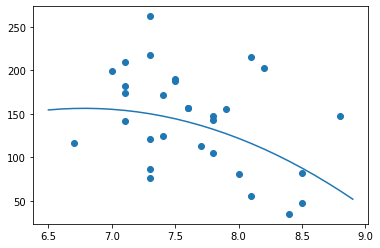

In [ ]:
#Plotting the graph
plt.scatter(np.array(xtrain, xtest), np.array(ytrain, ytest))
x = np.array([i/10 for i in range(65, 90)])
xnorm = (x - xmin) / (xmax - xmin)
ypred = np.multiply(np.multiply(xnorm, xnorm), m1) + np.multiply(m2, xnorm) + c
y = np.multiply(ypred, ymax - ymin) + ymin
plt.plot(x, y)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_Train = mean_absolute_error(ytrainPred, ytrain) 
MSE_Train = mean_squared_error(ytrainPred, ytrain) 
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5

MAE_Test = mean_absolute_error(ytestPred, ytest) 
MSE_Test = mean_squared_error(ytestPred, ytest) 
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5

 
print('Training Error :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error :
Mean Absolute Error : 43.32993237066865
Mean Squared Error : 2647.951296233725
Root Mean Squared Error : 51.45824808749055

Testing Error :
Mean Absolute Error : 56.78238228779111
Mean Squared Error : 3705.2852364465853
Root Mean Squared Error : 60.87105417558156


In [ ]:
x = float(input('pH of water : '))
normalizedX = (x - xmin) / (xmax - xmin)
predy = m1 * normalizedX ** 2 + m2 * normalizedX + c
y = predy * (ymax - ymin) + ymin
print('Estimated amount of bicarbonates :', round(y, 3))

pH of water : 5
Estimated amount of bicarbonates : 82.382
